In [3]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to pre process data
from sklearn.preprocessing import LabelEncoder

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [4]:
df1=pd.read_csv('TelcomCustomer-Churn_1.csv')
df2 = pd.read_csv('TelcomCustomer-Churn_2.csv')

In [5]:
df1.sample()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
3578,4795-WRNVT,Female,0,No,No,40,Yes,No,DSL,Yes


In [6]:
df1.shape

(7043, 10)

In [7]:
df2.sample()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6013,5671-UUNXD,No,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.65,5189.75,No


In [8]:
df2.shape

(7043, 12)

In [9]:
df = pd.merge(df1,df2,on='customerID')

In [10]:
df.shape

(7043, 21)

### Data Cleaning & Analysis

In [11]:
df.duplicated().sum()

0

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<Axes: ylabel='gender'>

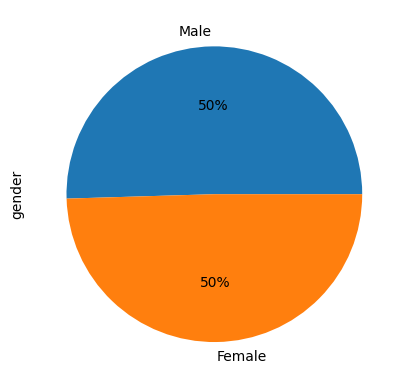

In [13]:
ax = df.gender.value_counts()
ax.plot(kind='pie',autopct='%.0f%%')
ax.plot()

<Axes: ylabel='Churn'>

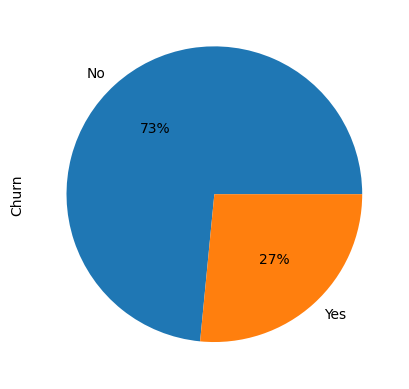

In [14]:
ax = df.Churn.value_counts()
ax.plot(kind='pie',autopct='%.0f%%')
# ax.plot()

In [15]:
df['TotalCharges'] = df['TotalCharges'].str.replace(' ','0').astype('float')

In [16]:
df['TotalCharges'] = np.where(df['TotalCharges']==0,df['TotalCharges'].mean(),df['TotalCharges'])

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
def plot_pie(df):
    df_tmp = pd.DataFrame()
    for i,col in enumerate(df.columns):
        if df[col].dtypes == 'object' and col !='customerID':
            df_tmp[col]= df[col]
            abc = df[col].value_counts()
            plt.pie(abc,autopct='%.0f%%',labels=df_tmp[col].value_counts().index)
            plt.title(col,bbox={'facecolor':'0.9', 'pad':5})
            plt.show()
            print('-'*100)
            

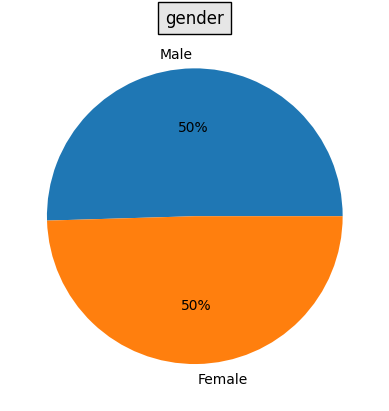

----------------------------------------------------------------------------------------------------


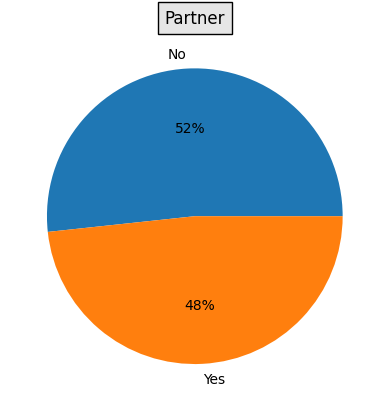

----------------------------------------------------------------------------------------------------


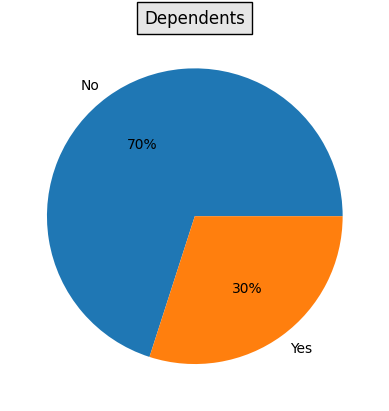

----------------------------------------------------------------------------------------------------


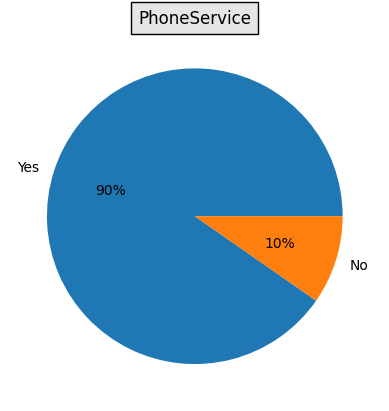

----------------------------------------------------------------------------------------------------


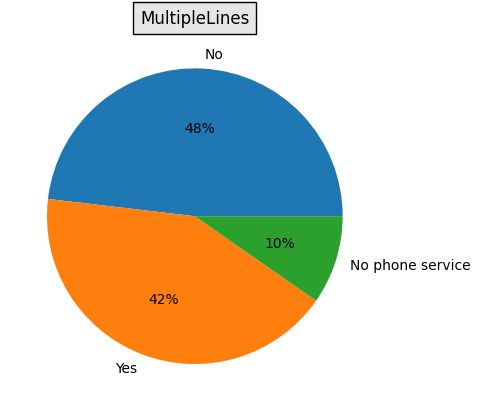

----------------------------------------------------------------------------------------------------


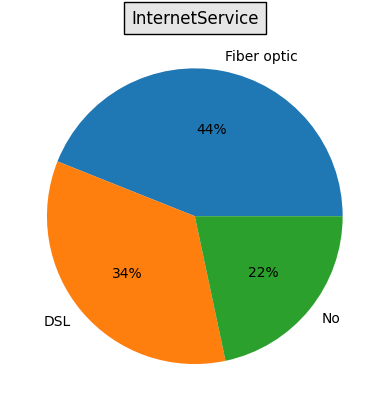

----------------------------------------------------------------------------------------------------


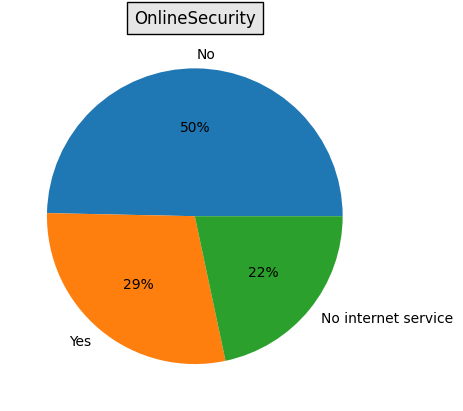

----------------------------------------------------------------------------------------------------


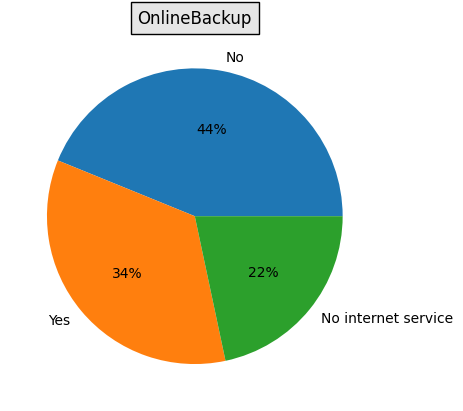

----------------------------------------------------------------------------------------------------


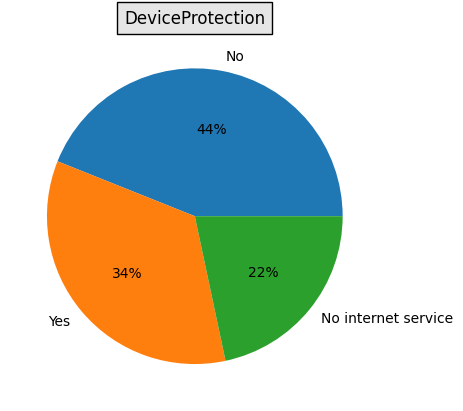

----------------------------------------------------------------------------------------------------


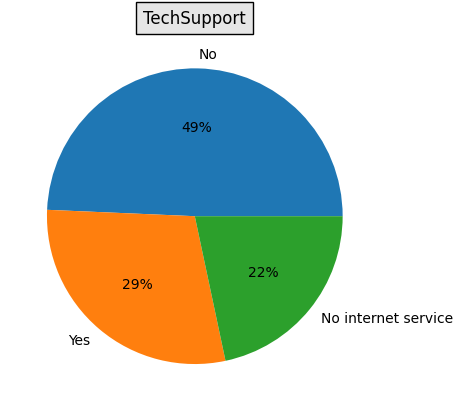

----------------------------------------------------------------------------------------------------


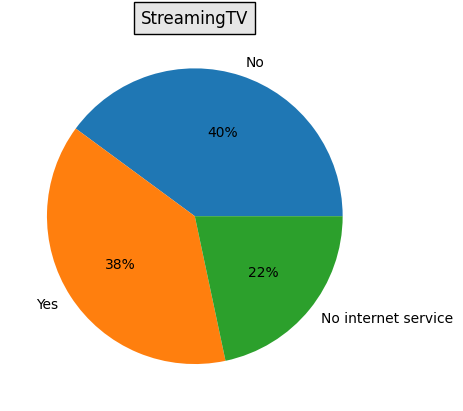

----------------------------------------------------------------------------------------------------


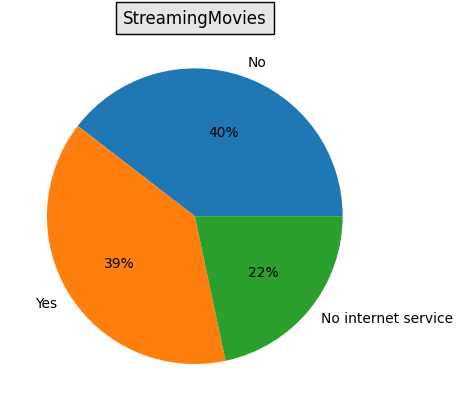

----------------------------------------------------------------------------------------------------


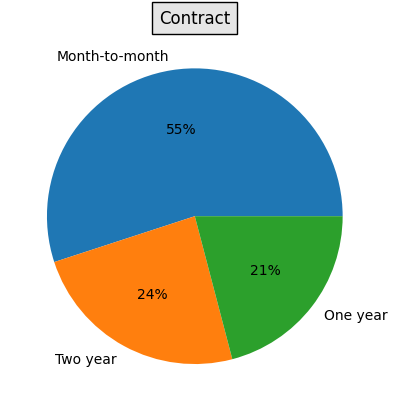

----------------------------------------------------------------------------------------------------


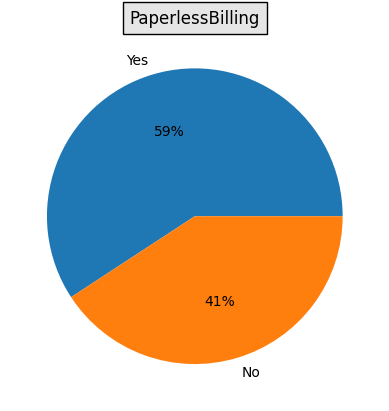

----------------------------------------------------------------------------------------------------


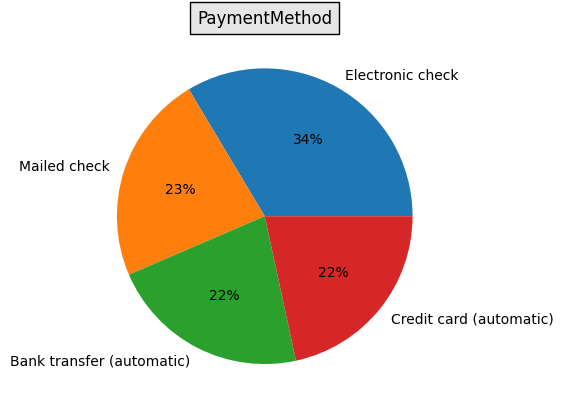

----------------------------------------------------------------------------------------------------


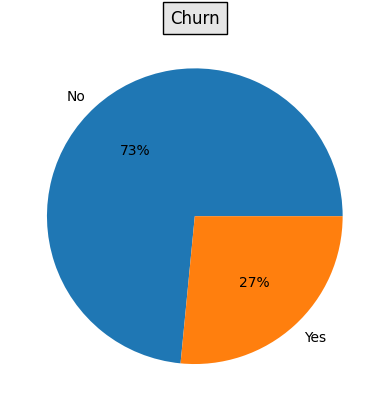

----------------------------------------------------------------------------------------------------


In [19]:
plot_pie(df)

#### Insights

1. **sex:** Male and female clients are nearly equal (Male: 50.48%; Female: -49.52%).
2. **Partner:** The percentage of customers with partners is about similar (Yes -51.70 and No -48.30%).
3. **Dependents:** Only one-third of customers have dependents, while the other two-thirds do not (No: 70% and Yes: 30%).
4. **Phone Service:** Nearly 90% of people have access to a phone.
5. **MultipleLines:** Of the 90% of the population with phone service, 42% have multiple lines, while the remaining 48% do not.
6. **Internet Service:** Only about 22% of people have access to the Internet. Furthermore, out of the remaining 78% of the population, 44% have fibre optic connection, and around 34% have DSL service
7.**Contract** More consumers (55%) chose month-to-month contracts, which were followed by two-year contracts (24%) and one-year contracts (21%), in that order
8. **PaperlessBilling:** 60% of individuals prefer paperless billing, compared to roughly 40% who do not.
9. **Payment Method:** Bank transfer (21%), credit card (21%), electronic cheque (33.5%), and mailed cheque (22.8%).
10.Churn: Churn rate is 26.5%

In [20]:
def encode_features(df):
    le = LabelEncoder()
    
    for i,col in enumerate(df.columns):
        if df[col].dtypes == 'object' and col !='customerID':
            df[col] = le.fit_transform(df[col])
    return df


In [21]:
df_new = encode_features(df)

In [22]:
df_new.drop('customerID',inplace=True,axis=1)

In [23]:
X = df_new.drop('Churn',axis=1)
y = df_new['Churn'] 

In [24]:
from sklearn.preprocessing import StandardScaler

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [27]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test) 

### MODEL BUILDING AND PERFORMANCE IMPROVEMENT

Let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.

In [28]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [32]:
def model_performance_classification_sklearn(model, X_train, y_train):
    # Predict the labels for the training data
    y_pred = model.predict(X_train)
    
    # Calculate different metrics
    accuracy = accuracy_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    
    # Create a DataFrame to display the metrics
    metrics_df = pd.DataFrame({
        'Accuracy': [accuracy],
        'Recall': [recall],
        'Precision': [precision],
        'F1': [f1]
    })
    
    return metrics_df

In [33]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [34]:
d_tree_model_train_perf = model_performance_classification_sklearn(d_tree, x_train, y_train)
print("Training performance:\n", d_tree_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0   0.99787  0.993216   0.998636  0.995918


In [35]:
#Calculating different metrics on test data
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree, x_test,y_test)
print("Testing performance:\n", d_tree_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.728886  0.453165   0.518841  0.483784


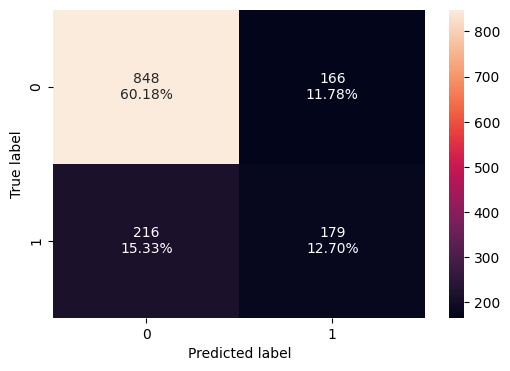

In [36]:
# Creating confusion matrix on test data
confusion_matrix_sklearn(d_tree,x_test,y_test)

The model is overfitting the training data as training recall/precision is much higher than the test recall/precision

In [37]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.18,1:0.72},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(x_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.18, 1: 0.72}, max_depth=3,
                       max_leaf_nodes=10, min_impurity_decrease=0.0001,
                       random_state=1)

In [38]:
# Calculating different metrics on training data
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator, x_train,y_train)
print("Training performance:\n", dtree_estimator_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.596912  0.942334   0.388531  0.550208


In [39]:
# Calculating different metrics on test data
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator, x_test,y_test)
print("Testing performance:\n", dtree_estimator_model_test_perf)

Testing performance:
    Accuracy   Recall  Precision        F1
0  0.633783  0.95443   0.430857  0.593701


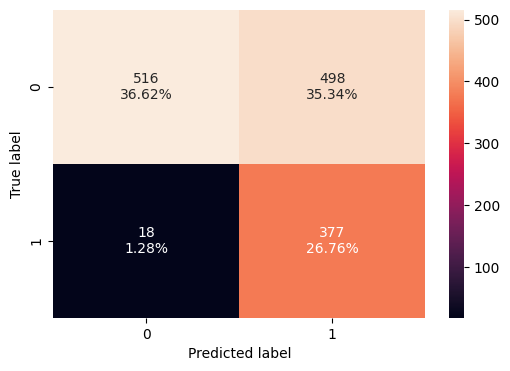

In [40]:
# Creating confusion matrix on test data
confusion_matrix_sklearn(dtree_estimator,x_test,y_test)

The model is generalizing well and not overfitting the data

Train and Test performance is comparably same however precision score is low 

#### Random Forest

In [41]:
# Initializing the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [42]:
# Calculating different metrics on training data
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator, x_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0   0.99787  0.994573   0.997279  0.995924


In [43]:
# Calculating different metrics on test data
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator, x_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.796309  0.470886   0.704545  0.564492


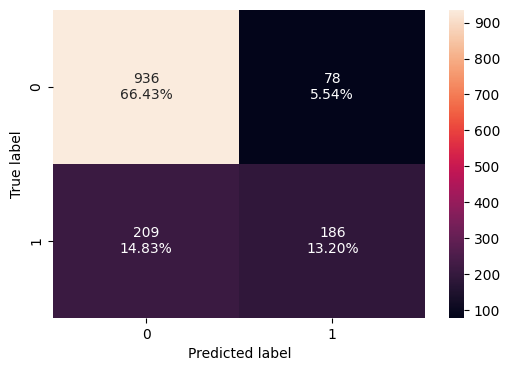

In [47]:
# Creating confusion matrix on test data
confusion_matrix_sklearn(rf_estimator,x_test,y_test)

The model is overfitting the training data.

We'll try to reduce overfitting and improve recall by hyperparameter tuning.

In [48]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.18,1:0.82},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring='recall',cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.18, 1: 0.82}, max_depth=5,
                       min_samples_leaf=6, min_samples_split=17, oob_score=True,
                       random_state=1)

In [49]:
# Calculating different metrics on training data
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned, x_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.691693  0.899593   0.454889  0.604238


In [50]:
# Calculating different metrics on test data
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned, x_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0   0.71682  0.891139   0.497175  0.638259


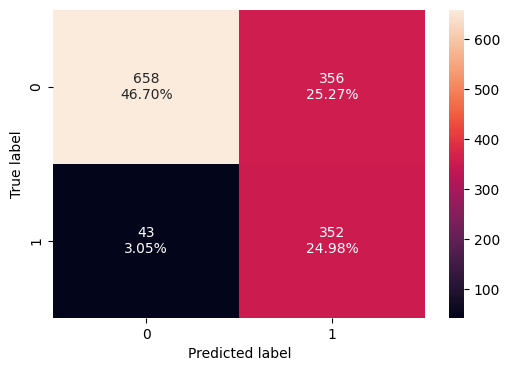

In [51]:
# Creating confusion matrix on test data
confusion_matrix_sklearn(rf_tuned,x_test,y_test)

Overfitting is reduced after hyper parameter tuning, model is generalising well however precision score is low similar to tuned  decision tree model

#### Ada Boost

In [52]:
# Initializing the AdaBoost classifier model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(x_train,y_train)

AdaBoostClassifier(random_state=1)

In [69]:
# Calculating different metrics on training data
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier, x_train,y_train)
print("Training performance:\n",ab_classifier_model_train_perf)

Training performance:
    Accuracy    Recall  Precision       F1
0  0.804402  0.537992   0.653213  0.59003


In [53]:
# Calculating different metrics on test data
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier, x_test,y_test)
print("Testing performance:\n",ab_classifier_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.818311  0.564557   0.726384  0.635328


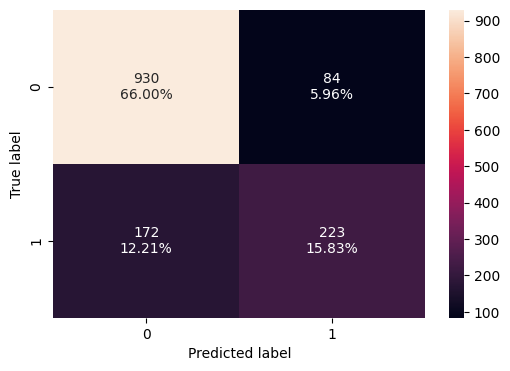

In [54]:
# Creating confusion matrix on test data
confusion_matrix_sklearn(ab_classifier,x_test,y_test)

Even without hyperparamter tuning, the Ada boost model is not overfitting which is a good sign but both recall and precision scores are low 

In [56]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "estimator": [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2),
                  DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": np.arange(0.1, 2, 0.1)
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(x_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=1.8000000000000003, n_estimators=10,
                   random_state=1)

In [57]:
# Calculating different metrics on training data
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned, x_train,y_train)
print("Training performance:\n",abc_tuned_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.750266  0.743555   0.515765  0.609058


In [58]:
# Calculating different metrics on test data
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned, x_test,y_test)
print("Testing performance:\n",abc_tuned_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.774308  0.751899   0.574468  0.651316


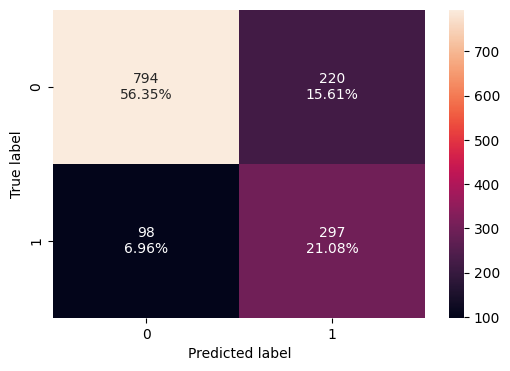

In [59]:
# Creating confusion matrix on test data
confusion_matrix_sklearn(abc_tuned,x_test,y_test)

Even after tuning, the model scores is performing similar to the base adaboost model with default parameters

#### Gradient Boost

In [60]:
# Initializing the Gradient bossting classifier
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(x_train,y_train)

GradientBoostingClassifier(random_state=1)

In [61]:
# Calculating different metrics on training data
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier, x_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.828009  0.549525   0.726457  0.625724


In [62]:
# Calculating different metrics on test data
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier, x_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.806955  0.534177   0.705686  0.608069


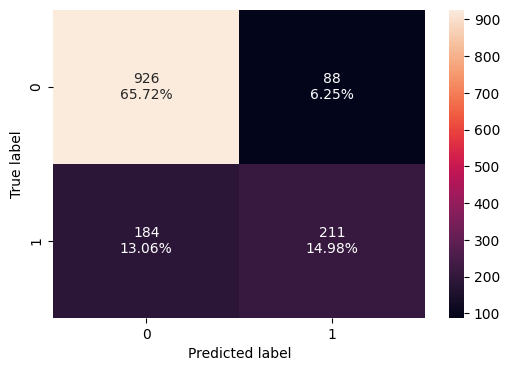

In [63]:
#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,x_test,y_test)

In [64]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(x_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, n_estimators=150, random_state=1,
                           subsample=0.9)

In [65]:
# Calculating different metrics on training data
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned, x_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.814341  0.529172   0.689046  0.598619


In [66]:
# Calculating different metrics on test data
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned, x_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

Testing performance:
    Accuracy    Recall  Precision        F1
0  0.811923  0.516456   0.733813  0.606241


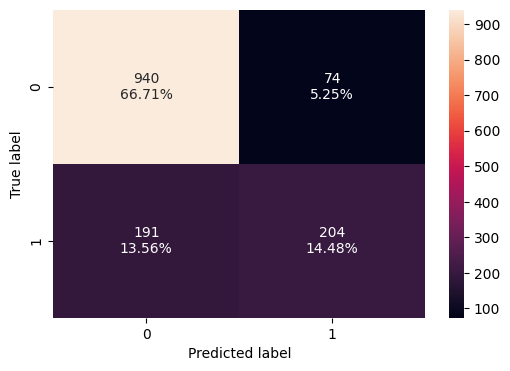

In [67]:
# Creating confusion matrix on test data
confusion_matrix_sklearn(gbc_tuned,x_test,y_test)

In [70]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T, dtree_estimator_model_train_perf.T, rf_estimator_model_train_perf.T,
    rf_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
    abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost Classifier",
    "Adaboost Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned"]
print("Training performance comparison:")

models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Adaboost Classifier,Adaboost Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned
Accuracy,0.997870,0.596912,0.997870,0.691693,0.804402,0.750266,0.828009,0.814341
Recall,0.993216,0.942334,0.994573,0.899593,0.537992,0.743555,0.549525,0.529172
Precision,0.998636,0.388531,0.997279,0.454889,0.653213,0.515765,0.726457,0.689046
F1,0.995918,0.550208,0.995924,0.604238,0.590030,0.609058,0.625724,0.598619


High recall ensures that the model captures most churn cases, reducing the risk of missing potential churners. At the same time, high precision ensures that the model does not misclassify non-churn customers as churners, which can help optimize the allocation of resources towards actual churners

The training performance indicates how well each model fits the training data. From the results, it appears that the Decision Tree and Random Forest Estimator models have achieved High Precision and recall scores, suggesting that they perform well in identifying potential churn customers during training.

The tuned models however scores less than base models except in adaboost scenario which approximately equal,  this is good in terms of reducing the overfitting of the model and bring the performance same in test data which is unseen data

However it is the performance in test data that defines the generalisation capability of the model

Hence let us see the test data performance 

In [71]:
# Testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T, dtree_estimator_model_test_perf.T, rf_estimator_model_test_perf.T,
    rf_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Adaboost Classifier",
    "Adaboost Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned"]
print("Testing performance comparison:")

models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Adaboost Classifier,Adaboost Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned
Accuracy,0.728886,0.633783,0.796309,0.716820,0.818311,0.774308,0.806955,0.811923
Recall,0.453165,0.954430,0.470886,0.891139,0.564557,0.751899,0.534177,0.516456
Precision,0.518841,0.430857,0.704545,0.497175,0.726384,0.574468,0.705686,0.733813
F1,0.483784,0.593701,0.564492,0.638259,0.635328,0.651316,0.608069,0.606241


The ensemble-based models (Adaboost Classifier, Adaboost Classifier Tuned, and Gradient Boost Classifier and Gradient boost tuned) outperform both the Decision Tree models and the Random Forest Estimator in terms of reducing the overfitting problem and better generalisation

Thus ensemble models generalize better to unseen data and have a higher predictive performance for identifying potential churn customers

The boosting models Adaboost and  Gradient Boost Classifier performed equally almost similar, as boosting which combines multiple weak learners (decision trees) to create a strong predictive model. Boosting algorithms iteratively train models, focusing on misclassified instances from previous iterations. This iterative process allows the model to learn and improve its predictions over time.

The Gradient Boost Classifier demonstrated the best performance on the test stage among the compared models. This suggests that the Gradient Boost Classifier is well-suited for predicting potential churn customers on unseen data